In [1]:
import pandas as pd
import numpy as np

<a id='top'></a>
# Data Cleaning
## Table of contents
1. [Geography Table](#gt)
2. [Player Table](#pt)
3. [Tournament Table](#tt)
4. [Date Table](#dt)
5. [Match Table](#mt)

<a id='gt'></a>
## 1. Geography Table ([to top](#top))

In [2]:
df_geo=pd.read_csv('geography.csv')

In [3]:
df_geo.head()

,country_ioc,continent,languages
0,JPN,Asia,ja
1,RUS,Europe,"ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua..."
2,FRA,Europe,"fr-FR,frp,br,co,ca,eu,oc"
3,AUS,Oceania,en-AU
4,CAN,America,"en-CA,fr-CA,iu"


In [4]:
df_geo.isnull().sum()

country_ioc    0
continent      0
languages      2
dtype: int64

In [5]:
df_geo.shape

(124, 3)

In [6]:
df_geo[df_geo['languages'].isnull()]

,country_ioc,continent,languages
34,URU,America,NaN
107,POC,Unknown,NaN


Ci sono 2 missing values dovuti al mancato match con countryInfo.csv: sono Uruguay e Pacific Oceania.  

In [7]:
match_real=pd.read_csv('tennis.csv',low_memory=False)

In [8]:
match_real[match_real['loser_ioc']=='POC']['loser_name']

86748             Mayka Zima
98038          Violet Apisah
98040          Violet Apisah
98044    Carol Young Suh Lee
Name: loser_name, dtype: object

In [9]:
match_real[match_real['winner_ioc']=='POC']['winner_name']

86247    Carol Young Suh Lee
86712             Mayka Zima
86713          Ayana Rengiil
89211    Carol Young Suh Lee
89212    Carol Young Suh Lee
Name: winner_name, dtype: object

I tennisiti della Pacific Oceania sono di diverse nazionalità aggregate per la coppa Davis e coppa Fed. Perciò sistemiamo la lingua dell'Uruguay e sistemiamo continente e aggiungiamo le più importanti lingue del POC (sele aggiungessimo tutte sarebbero più di 30).

In [10]:
df_geo[df_geo['country_ioc']=='URU']

,country_ioc,continent,languages
34,URU,America,NaN


In [11]:
df_geo[df_geo['country_ioc']=='POC']

,country_ioc,continent,languages
107,POC,Unknown,NaN


In [12]:
df_geo.loc[34]['languages']='es-UY'

In [13]:
df_geo.loc[107]['continent']='Oceania' #this is the pacific oceania, created for davis cup 
df_geo.loc[107]['languages']='en-AS,sm,to,en-CK,ml,en-FJ,fj,en-GU,ch-GU'#subset of languages

In [14]:
df_geo.to_csv('geo.csv',index=False)

<a id='pt'></a>
## 2. Player Table ([to top](#top))

In [238]:
df_play=pd.read_csv('player.csv')

In [239]:
df_play.head()

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
0,105453,JPN,Kei Nishikori,M,178.0,R,1989.0
1,106421,RUS,Daniil Medvedev,M,198.0,R,1996.0
2,104542,FRA,Jo-Wilfried Tsonga,M,188.0,R,1985.0
3,104871,FRA,Jeremy Chardy,M,188.0,R,1987.0
4,200282,AUS,Alex De Minaur,M,183.0,R,1999.0


In [240]:
df_play.shape

(10123, 7)

In [241]:
df_play['name'].unique().shape

(10104,)

In [242]:
df_play[df_play['name'].duplicated()]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
4357,223126,RUS,Ekaterina Makarova,F,NaN,U,NaN
4391,216586,HKG,Hei Ching Claudia Ng,F,NaN,R,2000.0
5934,207142,NED,Guy Stokman,M,NaN,R,NaN
6571,207982,ITA,Giuseppe Tresca,M,NaN,U,1999.0
7486,221745,TPE,Kuan Yi Lee,M,NaN,R,2002.0
7960,222915,EST,Liisa Varul,F,NaN,U,NaN
8030,222228,GBR,Holly Fischer,F,NaN,U,NaN
8105,222943,KAZ,Eleni Fasoula,F,NaN,U,NaN
8648,222066,NOR,Matylda Burylo,F,NaN,U,NaN
9040,236974,ARG,Emilse Lujan Ruiz,F,NaN,U,NaN


In [243]:
df_play.isnull().sum()

player_id           0
country_ioc         0
name                0
sex                 0
ht               9600
hand               33
year_of_birth    2109
dtype: int64

In [244]:
df_play[df_play['hand'].isnull()]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
836,200273,LIB,Hady Habib,M,NaN,NaN,1998.0
846,209238,GUA,Sebastian Dominguez,M,NaN,NaN,2002.0
974,207971,BAR,Xavier Lawrence,M,NaN,NaN,1999.0
980,207972,KOR,Minjong Park,M,NaN,NaN,2002.0
997,207973,LTU,Ainius Sabaliauskas,M,NaN,NaN,2004.0
1014,200620,PUR,Ignacio Garcia,M,NaN,NaN,NaN
1015,200274,PUR,Alex Diaz,M,NaN,NaN,1998.0
1016,200619,PUR,Sebastian Arcila,M,NaN,NaN,NaN
1019,144776,LUX,Christophe Tholl,M,NaN,NaN,1995.0
1024,202462,SRI,Yasitha De Silva,M,NaN,NaN,1996.0


Sistemare a mano i valori mancanti di **hand**.

In [245]:
#checked by us
df_play.loc[836, 'hand']='R'
df_play.loc[846, 'hand']='U'
df_play.loc[974, 'hand']='U'

df_play.loc[980, 'hand']='U'
df_play.loc[997, 'hand']='U'
df_play.loc[1014, 'hand']='U'

df_play.loc[1015, 'hand']='R'
df_play.loc[1016, 'hand']='U'
df_play.loc[1019, 'hand']='U'

df_play.loc[1024, 'hand']='U'
df_play.loc[4527, 'hand']='R'
df_play.loc[4860, 'hand']='R'

df_play.loc[5068, 'hand']='U'
df_play.loc[5110, 'hand']='U'
df_play.loc[5248, 'hand']='U'

df_play.loc[5383, 'hand']='U'
df_play.loc[5443, 'hand']='U'
df_play.loc[5511, 'hand']='R'

df_play.loc[5574, 'hand']='U'
df_play.loc[5603, 'hand']='R'
df_play.loc[5776, 'hand']='U'

df_play.loc[5822, 'hand']='U'
df_play.loc[6093, 'hand']='R'
df_play.loc[6361, 'hand']='U'

df_play.loc[6558, 'hand']='R'
df_play.loc[8968, 'hand']='U'
df_play.loc[8980, 'hand']='R'

df_play.loc[8985, 'hand']='R'
df_play.loc[8986, 'hand']='R'
df_play.loc[9008, 'hand']='L'

df_play.loc[9018, 'hand']='U'
df_play.loc[9022, 'hand']='R'
df_play.loc[9364, 'hand']='U'

In [246]:
df_play.isnull().sum()

player_id           0
country_ioc         0
name                0
sex                 0
ht               9600
hand                0
year_of_birth    2109
dtype: int64

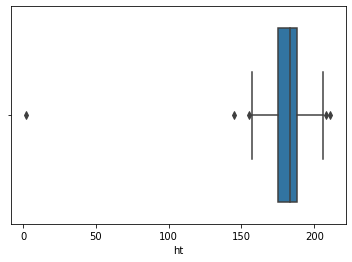

In [247]:
import seaborn as sns
sns.boxplot(df_play['ht'])

In [248]:
df_play[df_play['ht']<=160] # only the last two are wrong

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
91,201597,JPN,Kurumi Nara,F,155.0,R,1991.0
275,201595,JPN,Misaki Doi,F,159.0,L,1992.0
498,201616,USA,Lauren Davis,F,157.0,R,1994.0
814,215872,RUS,Kamilla Rakhimova,F,2.0,R,2001.0
5060,105661,SRB,Ilija Vucic,M,145.0,R,1991.0


In [249]:
df_play[df_play['ht']>=199] #these are the real heights

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
60,124187,USA,Reilly Opelka,M,211.0,R,1997.0
140,104731,RSA,Kevin Anderson,M,203.0,R,1986.0
141,103333,CRO,Ivo Karlovic,M,208.0,R,1979.0
183,104545,USA,John Isner,M,206.0,R,1986.0
388,104932,FRA,Kenny De Schepper,M,203.0,L,1988.0
789,105874,FRA,Albano Olivetti,M,203.0,R,1992.0
3443,105668,POL,Jerzy Janowicz,M,203.0,R,1991.0
4563,104249,BRA,Marcelo Melo,M,203.0,R,1984.0


Sistemiamo dati errati legati all'altezza.

In [250]:
df_play.loc[814, 'ht']=174
df_play.loc[5060, 'ht']=188

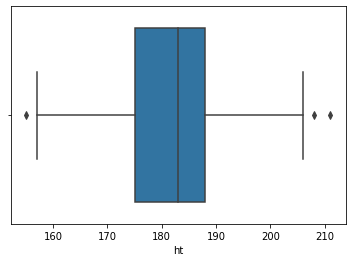

In [251]:
import seaborn as sns
sns.boxplot(df_play['ht'])

In [252]:
df_play[df_play['year_of_birth'].isnull()]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
853,209226,PAR,Adolfo Daniel Vallejo,M,NaN,R,NaN
861,209188,INA,Ari Fahresi,M,NaN,U,NaN
1014,200620,PUR,Ignacio Garcia,M,NaN,U,NaN
1016,200619,PUR,Sebastian Arcila,M,NaN,U,NaN
1868,215869,LTU,Paulina Bakaite,F,NaN,U,NaN
...,...,...,...,...,...,...,...
10117,225861,BUL,Viktoria Veleva,F,NaN,U,NaN
10119,223075,USA,Madeleine Jessup,F,NaN,U,NaN
10120,223216,USA,Katie Codd,F,NaN,U,NaN
10121,223217,USA,Amy Huang,F,NaN,U,NaN


In [253]:
df_play[df_play[['country_ioc','name']].duplicated()]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
4357,223126,RUS,Ekaterina Makarova,F,NaN,U,NaN
4391,216586,HKG,Hei Ching Claudia Ng,F,NaN,R,2000.0
5934,207142,NED,Guy Stokman,M,NaN,R,NaN
6571,207982,ITA,Giuseppe Tresca,M,NaN,U,1999.0
7486,221745,TPE,Kuan Yi Lee,M,NaN,R,2002.0
7960,222915,EST,Liisa Varul,F,NaN,U,NaN
8030,222228,GBR,Holly Fischer,F,NaN,U,NaN
9040,236974,ARG,Emilse Lujan Ruiz,F,NaN,U,NaN
9044,236977,ARG,Sofia Nahiara Garcia,F,NaN,U,NaN
9426,236980,FRA,Astrid Cirotte,F,NaN,U,NaN


In [254]:
df_play[df_play[['country_ioc','name']].duplicated()].shape

(17, 7)

Sistemiamo il problema legato ad avere lo stesso tennista ma id diverso: cancellando quella riga e rimappando il secondo id nel primo.

In [255]:
df_play[df_play['name']=='Ekaterina Makarova']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
298,201505,RUS,Ekaterina Makarova,F,178.0,L,1989.0
4357,223126,RUS,Ekaterina Makarova,F,NaN,U,NaN


In [256]:
df_play[df_play['name']=='Hei Ching Claudia Ng']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
2509,219835,HKG,Hei Ching Claudia Ng,F,NaN,U,NaN
4391,216586,HKG,Hei Ching Claudia Ng,F,NaN,R,2000.0


In [257]:
df_play[df_play['name']=='Guy Stokman']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
5146,206883,NED,Guy Stokman,M,NaN,R,2000.0
5934,207142,NED,Guy Stokman,M,NaN,R,NaN


In [258]:
df_play[df_play['name']=='Giuseppe Tresca']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
5383,206834,ITA,Giuseppe Tresca,M,NaN,U,NaN
6571,207982,ITA,Giuseppe Tresca,M,NaN,U,1999.0


In [259]:
df_play[df_play['name']=='Kuan Yi Lee'] #questo è valido solo che la 2002 è una donna

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
1008,134120,TPE,Kuan Yi Lee,M,NaN,R,1997.0
7486,221745,TPE,Kuan Yi Lee,M,NaN,R,2002.0


In questo caso non si tratta di errore, ma di due giocatori diversi.

In [260]:
df_play.loc[7486,'sex']='F'

In [261]:
df_play[df_play['name']=='Liisa Varul']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
7958,222914,EST,Liisa Varul,F,NaN,U,NaN
7960,222915,EST,Liisa Varul,F,NaN,U,NaN


In [262]:
df_play[df_play['name']=='Holly Fischer']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
1124,221142,GBR,Holly Fischer,F,NaN,U,2003.0
8030,222228,GBR,Holly Fischer,F,NaN,U,NaN


In [263]:
df_play[df_play['name']=='Emilse Lujan Ruiz']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
7496,222646,ARG,Emilse Lujan Ruiz,F,NaN,U,NaN
9040,236974,ARG,Emilse Lujan Ruiz,F,NaN,U,NaN


In [264]:
df_play[df_play['name']=='Sofia Nahiara Garcia']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
7513,220928,ARG,Sofia Nahiara Garcia,F,NaN,U,2003.0
9044,236977,ARG,Sofia Nahiara Garcia,F,NaN,U,NaN


In [265]:
df_play[df_play['name']=='Astrid Cirotte']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
9346,223401,FRA,Astrid Cirotte,F,NaN,U,NaN
9426,236980,FRA,Astrid Cirotte,F,NaN,U,NaN


In [266]:
df_play[df_play['name']=='Valentina Lia']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
2102,220334,ITA,Valentina Lia,F,NaN,U,1996.0
9548,239415,ITA,Valentina Lia,F,NaN,U,NaN


In [267]:
df_play[df_play['name']=='Stanislava Bobrovnikova']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
7091,221347,RUS,Stanislava Bobrovnikova,F,NaN,U,2003.0
9584,225865,RUS,Stanislava Bobrovnikova,F,NaN,U,NaN


In [268]:
df_play[df_play['name']=='Fitriani Sabatini']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
7139,221189,INA,Fitriani Sabatini,F,NaN,U,2001.0
9727,239429,INA,Fitriani Sabatini,F,NaN,U,NaN


In [269]:
df_play[df_play['name']=='Nana Kawagishi']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
7534,221771,JPN,Nana Kawagishi,F,NaN,U,2001.0
9752,244078,JPN,Nana Kawagishi,F,NaN,U,NaN


In [270]:
df_play[df_play['name']=='Ellie Myers']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
8885,222407,USA,Ellie Myers,F,NaN,U,NaN
9866,240168,USA,Ellie Myers,F,NaN,U,NaN


In [271]:
df_play[df_play['name']=='Maria Fernanda Navarro']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
9354,223367,MEX,Maria Fernanda Navarro,F,NaN,U,NaN
10001,223287,MEX,Maria Fernanda Navarro,F,NaN,U,NaN


In [272]:
df_play[df_play['name']=='Lara Onal']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
9775,224486,TUR,Lara Onal,F,NaN,U,NaN
10110,223215,TUR,Lara Onal,F,NaN,U,NaN


In [273]:
mappa1={223126:201505,219835:216586,207142:206883,206834:207982,222914:222915,222228:221142,222646:236974,236977:220928,223401:236980,239415:220334,225865:221347,239429:221189,244078:221771,222407:240168,223367:223287,224486:223215}
df_play=df_play.drop([4357,2509,5934,5383,7958,8030,7496,9044,9346,9548,9584,9727,9752,8885,9354,9775])

In [274]:
df_play['player_id'].describe()

count     10107.000000
mean     196393.250816
std       41499.038048
min      100644.000000
25%      201979.500000
50%      214817.000000
75%      221431.500000
max      245099.000000
Name: player_id, dtype: float64

In [275]:
df_play[df_play['player_id'].duplicated()]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
1558,206000,JPN,Kana Daniel,F,NaN,U,1995.0
1704,202420,BEL,An Sophie Mestach,F,NaN,R,1994.0
2661,206173,ITA,Beatrice Lombardo,F,NaN,U,1996.0
2802,202359,TPE,Chin Wei Chan,F,NaN,R,1985.0
4184,202475,BIH,Jasmina Tinjic,F,NaN,R,1991.0
4521,209866,LAT,Karlis Ozolins,M,NaN,R,2003.0
4533,208518,UNK,Hazem Naw,M,NaN,R,2000.0
4601,202277,SUI,Damien Wenger,M,NaN,U,2000.0
4761,206363,GER,Alexander Wolfschmidt,M,NaN,U,2000.0
4795,206137,SVK,Andrej Glvac,M,NaN,U,1997.0


Adesso sistemiamo il problema di due giocatori diversi, ma con stesso id: rimappiamo uno dei due in un nuovo id che parte da 246000 (sapendo che il massimo id è 245099, non incorriamo in sovrapposizioni). 

In [276]:
df_play[df_play['player_id']==206000]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
1009,206000,LIB,Michel Saade,M,NaN,U,1999.0
1558,206000,JPN,Kana Daniel,F,NaN,U,1995.0


In [277]:
df_play.loc[1558,'player_id']=246000

In [278]:
df_play[df_play['player_id']==202359]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
1137,202359,GER,Marvin Moeller,M,NaN,U,1999.0
2802,202359,TPE,Chin Wei Chan,F,NaN,R,1985.0


In [279]:
df_play.loc[2802,'player_id']=246001

In [280]:
df_play[df_play['player_id']==206173]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
586,206173,ITA,Jannik Sinner,M,188.0,R,2002.0
2661,206173,ITA,Beatrice Lombardo,F,NaN,U,1996.0


In [281]:
df_play.loc[2661,'player_id']=246002

In [282]:
df_play[df_play['player_id']==202420]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
689,202420,GBR,Aidan Mchugh,M,NaN,U,2001.0
1704,202420,BEL,An Sophie Mestach,F,NaN,R,1994.0


In [283]:
df_play.loc[1704,'player_id']=246003

In [284]:
df_play[df_play['player_id']==202475]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
884,202475,RSA,Philip Henning,M,NaN,R,2001.0
4184,202475,BIH,Jasmina Tinjic,F,NaN,R,1991.0


In [285]:
df_play.loc[4184,'player_id']=246004

In [286]:
df_play[df_play['player_id']==209866]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
2319,209866,USA,Grace Leake,F,NaN,L,1990.0
4521,209866,LAT,Karlis Ozolins,M,NaN,R,2003.0


In [287]:
df_play.loc[4521,'player_id']=246005

In [288]:
mappa2={(206000,'Kana Daniel'):246000,(202359,'Chin Wei Chan'):246001,(206173,'Beatrice Lombardo'):246002,(202420,'An Sophie Mestach'):246003,(202475,'Jasmina Tinjic'):246004,(209866,'Karlis Ozolins'):246005}

In [289]:
i=246005
for index,row in df_play[df_play['player_id'].duplicated()].iterrows():
    i+=1
    df_play.loc[index,'player_id']=i
    mappa2[(row['player_id'],row['name'])]=i

In [290]:
mappa2

{(206000, 'Kana Daniel'): 246000,
 (202359, 'Chin Wei Chan'): 246001,
 (206173, 'Beatrice Lombardo'): 246002,
 (202420, 'An Sophie Mestach'): 246003,
 (202475, 'Jasmina Tinjic'): 246004,
 (209866, 'Karlis Ozolins'): 246005,
 (208518, 'Hazem Naw'): 246006,
 (202277, 'Damien Wenger'): 246007,
 (206363, 'Alexander Wolfschmidt'): 246008,
 (206137, 'Andrej Glvac'): 246009,
 (206258, 'Saul Verdugo Vicente'): 246010,
 (202428, 'Joao Pedro Alcantara'): 246011,
 (206299, 'Max Benaim'): 246012,
 (202432, 'Nick Stachowiak'): 246013,
 (202433, 'Cong Tien Le'): 246014,
 (202434, 'Ricardo Ortiz'): 246015,
 (206062, 'Werapath Sirijariyaporn'): 246016,
 (202436, 'Zi Yang Cai'): 246017,
 (202437, 'Yang Liu'): 246018,
 (202349, 'Kai Lemstra'): 246019,
 (202447, 'Naru Shirafuji'): 246020,
 (202426, 'Matt Halpin'): 246021,
 (200033, 'Kushaan Nath'): 246022,
 (206426, 'Mihailo Samardzija'): 246023,
 (206430, 'Andrea Del Federico'): 246024,
 (202429, 'David Lucas Ambrozic'): 246025,
 (202477, 'Milan Radojko

In [291]:
df_play.isnull().sum()

player_id           0
country_ioc         0
name                0
sex                 0
ht               9584
hand                0
year_of_birth    2093
dtype: int64

Adesso cerchiamo di fillare i missing values con csv trovati online.
1. https://github.com/JeffSackmann/tennis_atp
2. https://datahub.io/sports-data/atp-world-tour-tennis-data
3. http://tennisabstract.com/reports/wtaRankings.html

In [292]:
play_real=pd.read_csv('atp_players.csv',low_memory=False)

In [293]:
play_real.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122,USA,NaN,Q54544
1,100002,Pancho,Segura,R,19210620,ECU,NaN,Q54581
2,100003,Frank,Sedgman,R,19271002,AUS,NaN,Q962049
3,100004,Giuseppe,Merlo,R,19271011,ITA,NaN,Q1258752
4,100005,Richard Pancho,Gonzales,R,19280509,USA,188.0,Q53554


In [294]:
play_real['name']=play_real['name_first']+' '+play_real['name_last']

In [295]:
df = pd.merge(df_play, play_real, left_on="name", right_on="name", suffixes=('', '_real'), how="left")

In [296]:
df.head()

,player_id,country_ioc,name,sex,ht,hand,year_of_birth,player_id_real,name_first,name_last,hand_real,dob,ioc,height,wikidata_id
0,105453,JPN,Kei Nishikori,M,178.0,R,1989.0,105453.0,Kei,Nishikori,R,19891229,JPN,178.0,Q311222
1,106421,RUS,Daniil Medvedev,M,198.0,R,1996.0,106421.0,Daniil,Medvedev,R,19960211,RUS,198.0,Q21622022
2,104542,FRA,Jo-Wilfried Tsonga,M,188.0,R,1985.0,104542.0,Jo-Wilfried,Tsonga,R,19850417,FRA,188.0,Q192661
3,104871,FRA,Jeremy Chardy,M,188.0,R,1987.0,104871.0,Jeremy,Chardy,R,19870212,FRA,188.0,Q176577
4,200282,AUS,Alex De Minaur,M,183.0,R,1999.0,200282.0,Alex,De Minaur,R,19990217,AUS,183.0,Q22958938


In [297]:
#getting year of birth

for index,_ in df.iterrows():
    try:
        df.loc[index, 'dob']=int(df['dob'][index][:4])
    except:
        print(df.loc[index, 'dob'])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [298]:
df["year_of_birth"] = df['year_of_birth'].fillna(df['dob'])
df[df['year_of_birth'].isnull()].shape

(2084, 15)

In [299]:
df["ht"] = df['ht'].fillna(df['height'])
df[df['ht'].isnull()].shape

(9535, 15)

In [300]:
df = df.drop(["name_first", "name_last","hand_real","dob","ioc","height","wikidata_id","player_id_real"], axis=1)

In [301]:
play_real=pd.read_csv('player_overviews_unindexed_csv.csv',low_memory=False)

In [302]:
play_real.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [303]:
play_real=play_real.drop(["player_slug", "player_url","residence","birthplace","birth_month","birth_day","turned_pro","weight_lbs","weight_kg","handedness","backhand"], axis=1)

In [304]:
for index,_ in play_real.iterrows():
    try:
        play_real.loc[index, 'player_id']=play_real.loc[index, 'first_name']+" "+play_real.loc[index, 'last_name']
    except:
        print(play_real.loc[index, 'player_id'],play_real.loc[index, 'first_name']+" "+play_real.loc[index, 'last_name'])

In [305]:
df = pd.merge(df, play_real, left_on="name", right_on="player_id", suffixes=('', '_real'), how="left")

In [306]:
df["year_of_birth"] = df['year_of_birth'].fillna(df['birth_year'])
df[df['year_of_birth'].isnull()].shape

(2084, 16)

In [307]:
df["ht"] = df['ht'].fillna(df['height_cm'])
df[df['ht'].isnull()].shape

(9166, 16)

In [308]:
df["ht"].describe()

count    976.000000
mean     181.765912
std       17.287726
min        0.000000
25%      178.000000
50%      183.000000
75%      188.000000
max      211.000000
Name: ht, dtype: float64

In [309]:
df['ht'] = df['ht'].replace(0, np.nan)

In [310]:
df[df['ht'].isnull()].shape

(9170, 16)

In [311]:
df["ht"].describe()

count    972.000000
mean     182.513920
std       12.784138
min        1.700000
25%      178.000000
50%      183.000000
75%      188.000000
max      211.000000
Name: ht, dtype: float64

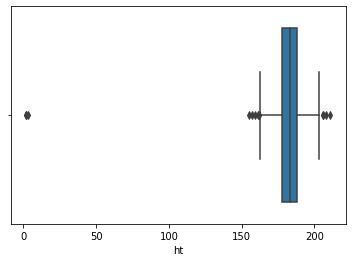

In [312]:
import seaborn as sns
sns.boxplot(df['ht'])

In [313]:
df[df['ht']<=160]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth,player_id_real,first_name,last_name,flag_code,birthdate,birth_year,height_ft,height_inches,height_cm
91,201597,JPN,Kurumi Nara,F,155.00,R,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,201595,JPN,Misaki Doi,F,159.00,L,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,201616,USA,Lauren Davis,F,157.00,R,1994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,122548,ISR,Edan Leshem,M,1.83,U,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4515,105464,INA,Christopher Rungkat,M,1.70,R,1990.0,Christopher Rungkat,Christopher,Rungkat,INA,1990.01.14,1990.0,"5'9""",69.0,175.0
5190,106428,COL,Mateo Andres Ruiz Naranjo,M,3.00,R,1997.0,Mateo Andres Ruiz Naranjo,Mateo Andres,Ruiz Naranjo,COL,1996.07.15,1996.0,"0'1""",1.0,3.0


In [314]:
df.loc[844, 'ht']=183
df.loc[4515, 'ht']=175
df.loc[5190, 'ht']=170

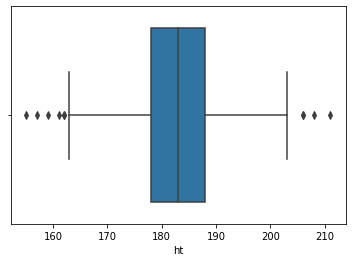

In [315]:
import seaborn as sns
sns.boxplot(df['ht'])

In [316]:
df=df.drop(["player_id_real", "first_name","last_name","flag_code","birthdate","birth_year","height_ft","height_inches","height_cm"], axis=1)

In [317]:
df.head()

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
0,105453,JPN,Kei Nishikori,M,178.0,R,1989.0
1,106421,RUS,Daniil Medvedev,M,198.0,R,1996.0
2,104542,FRA,Jo-Wilfried Tsonga,M,188.0,R,1985.0
3,104871,FRA,Jeremy Chardy,M,188.0,R,1987.0
4,200282,AUS,Alex De Minaur,M,183.0,R,1999.0


In [318]:
df.isnull().sum()

player_id           0
country_ioc         0
name                0
sex                 0
ht               9170
hand                0
year_of_birth    2084
dtype: int64

In [319]:
fem=pd.read_csv('Tennis-Abstract-2021-WTA-and-ITF-Rankings.csv')

In [320]:
for index,_ in fem.iterrows():
    try:
        fem.loc[index, 'year']=fem.loc[index, 'Birthdate'][:4]
    except:
        fem.loc[index, 'year']=np.nan

In [321]:
fem.head()

,Player,Country,Birthdate,year
0,Ashleigh Barty,AUS,1996-04-24,1996
1,Aryna Sabalenka,BLR,1998-05-05,1998
2,Barbora Krejcikova,CZE,1995-12-18,1995
3,Karolina Pliskova,CZE,1992-03-21,1992
4,Garbine Muguruza,ESP,1993-10-08,1993


In [322]:
df = pd.merge(df, fem, left_on="name", right_on="Player", suffixes=('', '_real'), how="left")

In [323]:
df["year_of_birth"] = df['year_of_birth'].fillna(df['year'])
df[df['year_of_birth'].isnull()].shape

(2053, 11)

In [324]:
df=df.drop(['Player','Country','Birthdate','year'], axis=1)

In [325]:
df.head()

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
0,105453,JPN,Kei Nishikori,M,178.0,R,1989
1,106421,RUS,Daniil Medvedev,M,198.0,R,1996
2,104542,FRA,Jo-Wilfried Tsonga,M,188.0,R,1985
3,104871,FRA,Jeremy Chardy,M,188.0,R,1987
4,200282,AUS,Alex De Minaur,M,183.0,R,1999


In [326]:
df.isnull().sum()

player_id           0
country_ioc         0
name                0
sex                 0
ht               9170
hand                0
year_of_birth    2053
dtype: int64

Eliminiamo infine i duplicati generati dai vari join, sapendo che **player_id** dovrà essere chiave primaria e quindi unica.

In [331]:
df1=df.drop_duplicates(subset='player_id')

In [332]:
df1[df1['name'].duplicated()]

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
7517,221745,TPE,Kuan Yi Lee,F,NaN,R,2002
8133,222943,KAZ,Eleni Fasoula,F,NaN,U,NaN
8676,222066,NOR,Matylda Burylo,F,NaN,U,NaN


In [333]:
df1[df1['name']=='Eleni Fasoula']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
8132,222942,GRE,Eleni Fasoula,F,NaN,U,NaN
8133,222943,KAZ,Eleni Fasoula,F,NaN,U,NaN


In [334]:
df1[df1['name']=='Matylda Burylo']

,player_id,country_ioc,name,sex,ht,hand,year_of_birth
8549,222845,POL,Matylda Burylo,F,NaN,U,NaN
8676,222066,NOR,Matylda Burylo,F,NaN,U,NaN


In [335]:
df1=df1.drop([8133,8549])

In [336]:
df1.isnull().sum()

player_id           0
country_ioc         0
name                0
sex                 0
ht               9138
hand                0
year_of_birth    2050
dtype: int64

In [377]:
df1.shape

(10105, 7)

Andiamo a sistemare le incongruenze tra geography e iso player.

In [ ]:
country_player=df1['country_ioc'].unique().tolist()
country_geo=df_geo['country_ioc'].unique().tolist()

In [ ]:
new_list=[]
for elem in country_player:
    if elem not in country_geo:
        new_list.append(elem)

In [ ]:
info=pd.read_csv('countryInfo.csv')

In [ ]:
continents=[]
lang=[]
nonmatch=set()
for elem in new_list:
    flag=0
    for _,row in info.iterrows():
        if elem==row['ISO3']:
            continents.append(row['Continent'])
            lang.append(row['Languages'])
            flag=1
    if flag==0:
        nonmatch.add(elem)

Proviamo a ricavare continent e languages dal countryinfo.csv inziale.

In [ ]:
new_list #lista degli elementi da sistemare

In [ ]:
new_list_1=['QAT', 'TTO', 'LBN', 'AZE', 'BRN', 'JAM', 'GHA', 'JOR','MRN', 'SYR', 'UAE', 'AHO', 'BEN', 'ERI', 'COD', 'LBA', 'TKM', 'BER', 'SMR','ANT','TOG','VIN', 'BOT', 'ZAM', 'SAU', 'BGR', 'LVA', 'CRI','BAN']

In [ ]:
nonmatch

In new_list_1 manca ITF che è stato sistemato manualmente in sql (mispelling di ITA).

In [ ]:
continent=['AS', 'AM', 'AS', 'AS', 'AS', 'AM', 'AF', 'AS', 'AM', 'AS','AS','AM', 'AF', 'AF', 'AF', 'AS',  'AS','AM', 'EU','AM','AF', 'AM', 'AF','AF','AS', 'EU', 'EU','AM','AS']

In [ ]:
lang=['ar-QA,es', 'en-TT,hns,fr,es,zh', 'ar-LB,fr-LB,en,hy', 'az,ru,hy', 'ms-BN,en-BN', 'en-JM', 'en-GH,ak,ee,tw', 'ar-JO,en', 'fr-MQ','ar-SY,ku,hy,arc,fr,en', 'ar-AE,fa,en,hi,ur', 'nl-AN,en,es', 'fr-BJ', 'aa-ER,ar,tig,kun,ti-ER','fr-CD,ln,kg', 'ar-LY,it,en', 'tk,ru,uz', 'en-BM,pt', 'it-SM','nl-AN,en,es', 'fr-TG,ee,hna,kbp,dag,ha', 'en-VC,fr', 'en-BW,tn-BW',  'en-ZM,bem,loz,lun,lue,ny,toi', 'ar-SA', 'bg,tr-BG', 'lv,ru,lt', 'es-CR,en','bn-BD,en']

Aggiungiamo manualmente questi ioc mancanti.

In [ ]:
d = {'country_ioc': new_list_1, 'continent': continent,'languages':lang}
new_df = pd.DataFrame(data=d)

In [ ]:
new_df.head()

In [ ]:
new_df['continent']=new_df['continent'].replace({'AS':'Asia','AM':'America','EU':'Europe','AF':'Africa'})

Questo è il csv che verrà aggiunto al database precedentemente creato.

In [ ]:
new_df.to_csv('new_continent.csv',index=False)

In [337]:
df1.to_csv('play_pro.csv',index=False)

<a id='tt'></a>
## 3. Tournament Table ([to top](#top))

In [109]:
df_tour=pd.read_csv('tournament.csv')

In [110]:
df_tour.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,tourney_spectators,tourney_revenue
0,2019-M020,Brisbane,Hard,32,A,0,3928,742618.69
1,2019-0451,Doha,Hard,32,A,0,2923,550943.19
2,2019-0891,Pune,Hard,32,A,0,4062,1005592.39
3,2019-0301,Auckland,Hard,32,A,1,2784,489426.09
4,2019-M001,Sydney,Hard,32,A,1,3258,567644.24


In [111]:
df_tour.isnull().sum()

tourney_id             0
tourney_name           0
surface               62
draw_size              0
tourney_level          0
tourney_date           0
tourney_spectators     0
tourney_revenue        0
dtype: int64

In [112]:
df_tour.shape

(4853, 8)

In [113]:
df_tour['surface'].value_counts()

Hard      2558
Clay      2042
Grass      103
Carpet      88
Name: surface, dtype: int64

Completiamo a mano **surface** usando wikipedia.

In [114]:
for index,row in df_tour[df_tour['surface'].isnull()].iterrows():
    print(index,row['tourney_id'][:4],row['tourney_name'])

2089 2017 Fed Cup G2 RR: ECU vs CUB
2090 2017 Fed Cup G2 RR: ECU vs URU
2091 2017 Fed Cup G2 RR: URU vs CUB
2092 2017 Fed Cup G2 RR: DOM vs BAR
2093 2017 Fed Cup G2 RR: GUA vs BAR
2094 2017 Fed Cup G2 RR: GUA vs DOM
2095 2017 Fed Cup G2 RR: PUR vs HON
2096 2017 Fed Cup G2 RR: PUR vs TTO
2097 2017 Fed Cup G2 RR: TTO vs HON
2098 2017 Fed Cup G2 RR: BAH vs PAN
2099 2017 Fed Cup G2 RR: CRC vs BAH
2100 2017 Fed Cup G2 RR: CRC vs PAN
2101 2017 Fed Cup G2 RR: PER vs BAH
2102 2017 Fed Cup G2 RR: PER vs CRC
2103 2017 Fed Cup G2 RR: PER vs PAN
2104 2017 Fed Cup G2 PM: CUB vs TTO
2105 2017 Fed Cup G2 PM: DOM vs CRC
2106 2017 Fed Cup G2 PM: BAR vs BAH
2107 2017 Fed Cup G2 PM: URU vs HON
2108 2017 Fed Cup G2 PPO: ECU vs PUR
2109 2017 Fed Cup G2 PPO: GUA vs PER
2227 2016 Fed Cup G2 RR: CHI vs CRC
2228 2016 Fed Cup G2 RR: CHI vs HON
2229 2016 Fed Cup G2 RR: CRC vs HON
2230 2016 Fed Cup G2 RR: VEN vs CHI
2231 2016 Fed Cup G2 RR: VEN vs CRC
2232 2016 Fed Cup G2 RR: VEN vs HON
2233 2016 Fed Cup G2 RR: B

In [115]:
#since the surface changes in relation to the match, we will check it by hand

#2017 fed cup

df_tour.loc[2089, 'surface']='Clay'
df_tour.loc[2090, 'surface']='Clay'
df_tour.loc[2091, 'surface']='Clay'
df_tour.loc[2092, 'surface']='Clay'
df_tour.loc[2093, 'surface']='Clay'
df_tour.loc[2094, 'surface']='Clay'
df_tour.loc[2095, 'surface']='Clay'


df_tour.loc[2096, 'surface']='Clay'
df_tour.loc[2097, 'surface']='Clay'
df_tour.loc[2098, 'surface']='Clay'
df_tour.loc[2099, 'surface']='Clay'
df_tour.loc[2100, 'surface']='Clay'
df_tour.loc[2101, 'surface']='Clay'
df_tour.loc[2102, 'surface']='Clay'


df_tour.loc[2103, 'surface']='Clay'
df_tour.loc[2104, 'surface']='Clay'
df_tour.loc[2105, 'surface']='Clay'
df_tour.loc[2106, 'surface']='Clay'
df_tour.loc[2107, 'surface']='Clay'
df_tour.loc[2108, 'surface']='Clay'
df_tour.loc[2109, 'surface']='Clay'

#2016 fed cup

df_tour.loc[2227, 'surface']='Hard'
df_tour.loc[2228, 'surface']='Hard'
df_tour.loc[2229, 'surface']='Hard'
df_tour.loc[2230, 'surface']='Hard'
df_tour.loc[2231, 'surface']='Hard'
df_tour.loc[2232, 'surface']='Hard'

df_tour.loc[2233, 'surface']='Hard'
df_tour.loc[2234, 'surface']='Hard'
df_tour.loc[2235, 'surface']='Hard'
df_tour.loc[2236, 'surface']='Hard'
df_tour.loc[2237, 'surface']='Hard'
df_tour.loc[2238, 'surface']='Hard'
df_tour.loc[2239, 'surface']='Hard'

df_tour.loc[2240, 'surface']='Hard'
df_tour.loc[2241, 'surface']='Hard'
df_tour.loc[2242, 'surface']='Hard'
df_tour.loc[2243, 'surface']='Hard'
df_tour.loc[2244, 'surface']='Hard'
df_tour.loc[2245, 'surface']='Hard'
df_tour.loc[2246, 'surface']='Hard'

#2017 davis cup

df_tour.loc[4400, 'surface']='Clay'
df_tour.loc[4401, 'surface']='Hard'
df_tour.loc[4402, 'surface']='Clay'
df_tour.loc[4404, 'surface']='Hard'
df_tour.loc[4405, 'surface']='Hard'
df_tour.loc[4406, 'surface']='Hard'
df_tour.loc[4407, 'surface']='Hard'

df_tour.loc[4408, 'surface']='Clay'
df_tour.loc[4409, 'surface']='Hard'
df_tour.loc[4410, 'surface']='Hard'
df_tour.loc[4411, 'surface']='Carpet'
df_tour.loc[4412, 'surface']='Clay'
df_tour.loc[4413, 'surface']='Hard'
df_tour.loc[4414, 'surface']='Hard'

df_tour.loc[4415, 'surface']='Carpet'
df_tour.loc[4416, 'surface']='Hard'
df_tour.loc[4417, 'surface']='Hard'
df_tour.loc[4418, 'surface']='Hard'
df_tour.loc[4421, 'surface']='Hard'
df_tour.loc[4422, 'surface']='Hard'
df_tour.loc[4431, 'surface']='Hard'

In [116]:
df_tour.isnull().sum()

tourney_id            0
tourney_name          0
surface               0
draw_size             0
tourney_level         0
tourney_date          0
tourney_spectators    0
tourney_revenue       0
dtype: int64

In [117]:
df_tour['surface'].value_counts()

Hard      2593
Clay      2067
Grass      103
Carpet      90
Name: surface, dtype: int64

In [118]:
df_tour.to_csv('tourney.csv',index=False)

<a id='dt'></a>
## 4. Date Table ([to top](#top))

In [119]:
df_date=pd.read_csv('date.csv')

In [120]:
df_date.head()

,date_id,year,month,day,quarter
0,0,2018,12,31,3
1,1,2019,1,7,1
2,2,2019,1,14,1
3,3,2019,2,4,1
4,4,2019,2,11,1


In [121]:
df_date.isnull().sum()

date_id    0
year       0
month      0
day        0
quarter    0
dtype: int64

In [122]:
df_date.shape

(375, 5)

In [123]:
df_date['year'].describe()

count     375.000000
mean     2018.274667
std         1.622625
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: year, dtype: float64

<a id='mt'></a>
## 5. Match Table ([to top](#top))

In [340]:
df_match=pd.read_csv('match.csv')

In [341]:
df_match.isnull().sum()

tourney_id                 0
match_num                  0
winner_id                  0
loser_id                   0
score                    175
best_of                    0
round                      0
minutes               104437
w_ace                 103789
w_df                  103789
w_svpt                103789
w_1stIn               103789
w_1stWon              103789
w_2ndWon              103789
w_SvGms               103785
w_bpSaved             103789
w_bpFaced             103789
l_ace                 103789
l_df                  103789
l_svpt                103789
l_1stIn               103789
l_1stWon              103789
l_2ndWon              103789
l_SvGms               103785
l_bpSaved             103789
l_bpFaced             103789
winner_rank            19379
winner_rank_points     19395
loser_rank             35256
loser_rank_points      35272
dtype: int64

In [342]:
df_match.shape

(186073, 30)

In [343]:
mappa1

{223126: 201505,
 219835: 216586,
 207142: 206883,
 206834: 207982,
 222914: 222915,
 222228: 221142,
 222646: 236974,
 236977: 220928,
 223401: 236980,
 239415: 220334,
 225865: 221347,
 239429: 221189,
 244078: 221771,
 222407: 240168,
 223367: 223287,
 224486: 223215}

Rimappo gli id utilizzando mappa1 e mappa2 estratte dalla tabella **Player**.

In [344]:
df_match['winner_id'] = df_match['winner_id'].replace(mappa1)
df_match['loser_id'] = df_match['loser_id'].replace(mappa1)

In [345]:
mt=df_match.join(df_tour.set_index('tourney_id'),on='tourney_id', how="left")

In [347]:
mt=mt.rename(columns={'tourney_date':'date_id'})

In [348]:
mtd=mt.join(df_date.set_index('date_id'),on='date_id', how="left")

In [351]:
df=pd.read_csv('player.csv')

In [352]:
mtdp1 = mtd.merge(df,left_on="winner_id", right_on="player_id", suffixes=('', '_winner'), how="left")

In [354]:
mtdp = pd.merge(mtdp1, df, left_on="loser_id", right_on="player_id", suffixes=('', '_loser'), how="left")

In [356]:
mtdp.head()

,tourney_id,match_num,winner_id,loser_id,score,best_of,round,minutes,w_ace,w_df,...,ht,hand,year_of_birth,player_id_loser,country_ioc_loser,name_loser,sex_loser,ht_loser,hand_loser,year_of_birth_loser
0,2019-M020,300-2019-M020,105453,106421,6-4 3-6 6-2,3,F,124.0,3.0,3.0,...,178.0,R,1989.0,106421,RUS,Daniil Medvedev,M,198.0,R,1996.0
1,2019-M020,299-2019-M020,106421,104542,7-6(6) 6-2,3,SF,82.0,10.0,1.0,...,198.0,R,1996.0,104542,FRA,Jo-Wilfried Tsonga,M,188.0,R,1985.0
2,2019-M020,298-2019-M020,105453,104871,6-2 6-2,3,SF,66.0,2.0,2.0,...,178.0,R,1989.0,104871,FRA,Jeremy Chardy,M,188.0,R,1987.0
3,2019-M020,297-2019-M020,104542,200282,6-4 7-6(2),3,QF,106.0,12.0,2.0,...,188.0,R,1985.0,200282,AUS,Alex De Minaur,M,183.0,R,1999.0
4,2019-M020,296-2019-M020,106421,105683,6-7(2) 6-3 6-4,3,QF,129.0,12.0,3.0,...,198.0,R,1996.0,105683,CAN,Milos Raonic,M,196.0,R,1990.0


In [357]:
mappa2

{(206000, 'Kana Daniel'): 246000,
 (202359, 'Chin Wei Chan'): 246001,
 (206173, 'Beatrice Lombardo'): 246002,
 (202420, 'An Sophie Mestach'): 246003,
 (202475, 'Jasmina Tinjic'): 246004,
 (209866, 'Karlis Ozolins'): 246005,
 (208518, 'Hazem Naw'): 246006,
 (202277, 'Damien Wenger'): 246007,
 (206363, 'Alexander Wolfschmidt'): 246008,
 (206137, 'Andrej Glvac'): 246009,
 (206258, 'Saul Verdugo Vicente'): 246010,
 (202428, 'Joao Pedro Alcantara'): 246011,
 (206299, 'Max Benaim'): 246012,
 (202432, 'Nick Stachowiak'): 246013,
 (202433, 'Cong Tien Le'): 246014,
 (202434, 'Ricardo Ortiz'): 246015,
 (206062, 'Werapath Sirijariyaporn'): 246016,
 (202436, 'Zi Yang Cai'): 246017,
 (202437, 'Yang Liu'): 246018,
 (202349, 'Kai Lemstra'): 246019,
 (202447, 'Naru Shirafuji'): 246020,
 (202426, 'Matt Halpin'): 246021,
 (200033, 'Kushaan Nath'): 246022,
 (206426, 'Mihailo Samardzija'): 246023,
 (206430, 'Andrea Del Federico'): 246024,
 (202429, 'David Lucas Ambrozic'): 246025,
 (202477, 'Milan Radojko

In [358]:
for index,row in mtdp.iterrows():
    if (row['winner_id'],row['name']) in mappa2:
        try:
            mtdp.loc[index, 'winner_id']=mappa2[(row['winner_id'],row['name'])]
        except:
            print(mtdp.loc[index])
    elif (row['loser_id'],row['name']) in mappa2:
        try:
            mtdp.loc[index, 'loser_id']=mappa2[(row['loser_id'],row['name_loser'])]
        except:
            print(mtdp.loc[index])

Andiamo a cercare gli score che vengono sostituiti da �, >, def.

In [359]:
mtdp[mtdp['score']=='�'][['tourney_id','tourney_name','name','name_loser']]

,tourney_id,tourney_name,name,name_loser
19951,2017-W-WITF-IND-01A-2017,Gwalior $15K,Hsin Yuan Shih,Radhika Yadav
41506,2016-W-C10-GBR-02A-2016,Sunderland $10K,Katy Dunne,Katie Boulter
41999,2016-W-C10-GRE-04A-2016,Heraklion $10K,Raluca Georgiana Serban,Dalma Galfi
43417,2016-W-C10-ITA-20A-2016,Solarino $10K,Susan Bandecchi,Giulia Tedesco
44878,2016-W-C10-POR-06A-2016,Ponta Delgada Azores $10K,Maria Joao Koehler,Desirae Krawczyk
44947,2016-W-C10-ROU-01A-2016,Galati $10K,Alexandra Perper,Ani Amiraghyan
49333,2016-W-C25-BRA-03A-2016,Sao Paulo $25K,Ana Bogdan,Tamara Zidansek
49728,2016-W-C25-CHN-03A-2016,Qujing $25K,Su Jeong Jang,Ching Wen Hsu
50669,2016-W-C25-IND-03A-2016,Pune $25K,Irina Khromacheva,Ankita Raina
50895,2016-W-C25-ITA-05A-2016,Rome $25K,Jasmine Paolini,Alexandra Cadantu


In [360]:
mtdp.loc[19951,'score']='6-2 6-4'
mtdp.loc[41506,'score']='6-1 7-5'
mtdp.loc[41999,'score']='6-3 6-0'
mtdp.loc[43417,'score']='6-4 6-2'
mtdp.loc[44878,'score']='6-4 7-6(2)'
mtdp.loc[44947,'score']='W/O'

mtdp.loc[49333,'score']='4-6 7-6(2) 6-4'
mtdp.loc[49728,'score']='6-2 6-1'
mtdp.loc[50669,'score']='6-4 6-4'
mtdp.loc[50895,'score']='7-5 7-6(2)'
mtdp.loc[52370,'score']='RET'

mtdp.loc[52382,'score']='6-2 6-2'
mtdp.loc[52766,'score']='3-6 7-6(5) 6-4'
mtdp.loc[53979,'score']='W/O'
mtdp.loc[54339,'score']='RET'
mtdp.loc[54427,'score']='W/O'

#mtdp.loc[54340,'score']=questa partita non esiste 
mtdp=mtdp.drop([54340])

In [361]:
dizio=set()
for index,row in mtdp[mtdp['score'].notnull()].iterrows():
    if len(row['score'])<5:
        dizio.add(row['score'])
        
        
print(dizio)

{'DEF', 'Def.', 'W/O', 'BYE', '>', 'RET'}


In [362]:
mtdp[mtdp['score']=='>'][['tourney_id','tourney_name','name','name_loser']]

,tourney_id,tourney_name,name,name_loser
55840,2016-1005,Rabat,Salma Charif,Amra Sadikovic
107430,2019-7316,Cary CH,Petros Chrysochos,Christian Langmo


In [363]:
mtdp.loc[55840,'score']='DEF'
mtdp.loc[107430,'score']='W/O'

In [364]:
mtdp[mtdp['score']=='Def.'][['tourney_id','tourney_name','name','name_loser']]

,tourney_id,tourney_name,name,name_loser
10463,2018-0314,Gstaad,Facundo Bagnis,Yann Marti
107342,2019-7288,Seoul CH,Akira Santillan,Youssef Hossam


In [365]:
mtdp.loc[10463,'score']='W/O'
mtdp.loc[107342,'score']='W/O'

In [366]:
for index,row in mtdp[mtdp['score'].isnull()].iterrows():
    print(index,row['tourney_id'][:4],row['tourney_name'],' MATCH: ',row['name'],' - ',row['name_loser'])

706 2019 Australian Open  MATCH:  Bianca Andreescu  -  Katie Swan
755 2019 Australian Open  MATCH:  Conny Perrin  -  Carina Witthoeft
794 2019 Australian Open  MATCH:  Bianca Andreescu  -  Tereza Smitkova
5148 2019 US Open  MATCH:  Robin Anderson  -  Nicole Gibbs
7449 2018 Acapulco  MATCH:  Dayana Yastremska  -  Amandine Hesse
7450 2018 Acapulco  MATCH:  Jasmine Paolini  -  Rebecca Peterson
7451 2018 Acapulco  MATCH:  Jana Fett  -  Arantxa Rus
8299 2018 Monte Carlo Masters  MATCH:  Pierre Hugues Herbert  -  Ilya Ivashka
8300 2018 Monte Carlo Masters  MATCH:  Dusan Lajovic  -  Stefanos Tsitsipas
8301 2018 Monte Carlo Masters  MATCH:  Andreas Seppi  -  Marco Cecchinato
9502 2018 s Hertogenbosch  MATCH:  Veronika Kudermetova  -  Valentini Grammatikopoulou
9503 2018 s Hertogenbosch  MATCH:  Marina Melnikova  -  Fanny Stollar
9504 2018 s Hertogenbosch  MATCH:  Anna Blinkova  -  Antonia Lottner
9780 2018 Eastbourne  MATCH:  Natalia Vikhlyantseva  -  Kurumi Nara
9781 2018 Eastbourne  MATCH:  

138469 2018 Antalya 15K  MATCH:  Oona Orpana  -  Daria Snigur
149379 2019 W25 Hong Kong  MATCH:  Dasha Lopatetskaya  -  Varvara Gracheva
149390 2019 W25 Hong Kong  MATCH:  Olivia Tjandramulia  -  Caroline Uebelhoer
157737 2019 W25 Singapore  MATCH:  Tara Moore  -  Junri Namigata
157745 2019 W25 Singapore  MATCH:  Olivia Tjandramulia  -  Victoria Rodriguez
164851 2019 W60 Ashland KY  MATCH:  Ellen Perez  -  Zoe Hives
166834 2019 W15 Tabarka  MATCH:  Joanne Zuger  -  Chi Chi Scholl
166835 2019 W15 Tabarka  MATCH:  Barbara Gatica  -  Eugenia Ganga
166846 2019 W15 Antalya  MATCH:  Oana Georgeta Simion  -  Ozlem Uslu
166849 2019 W15 Antalya  MATCH:  Ani Vangelova  -  Petia Arshinkova
166852 2019 W15 Antalya  MATCH:  Mayuka Aikawa  -  Francesca Jones
166853 2019 W15 Antalya  MATCH:  Kotomi Takahata  -  Julia Stamatova
166854 2019 W15 Antalya  MATCH:  Honoka Kobayashi  -  Siqi Cao
166855 2019 W15 Antalya  MATCH:  Ayaka Okuno  -  Vlada Ekshibarova
166856 2019 W15 Antalya  MATCH:  Evgeniya Burd

Queste partite sono inesistenti, fanno riferimento sempre ai vari giocatori qualifcati nei tornei. Probabilmente un problema di crawling e quindi eliminiamo questi match.

In [368]:
match=mtdp[mtdp['score'].notna()]

In [369]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190560 entries, 0 to 190739
Data columns (total 55 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tourney_id           190560 non-null  object 
 1   match_num            190560 non-null  object 
 2   winner_id            190560 non-null  int64  
 3   loser_id             190560 non-null  int64  
 4   score                190560 non-null  object 
 5   best_of              190560 non-null  int64  
 6   round                190560 non-null  object 
 7   minutes              83285 non-null   float64
 8   w_ace                83932 non-null   float64
 9   w_df                 83932 non-null   float64
 10  w_svpt               83932 non-null   float64
 11  w_1stIn              83932 non-null   float64
 12  w_1stWon             83932 non-null   float64
 13  w_2ndWon             83932 non-null   float64
 14  w_SvGms              83936 non-null   float64
 15  w_bpSaved        

In [371]:
match[match['match_num'].duplicated()]

,tourney_id,match_num,winner_id,loser_id,score,best_of,round,minutes,w_ace,w_df,...,ht,hand,year_of_birth,player_id_loser,country_ioc_loser,name_loser,sex_loser,ht_loser,hand_loser,year_of_birth_loser
27,2019-M020,271-2019-M020,215018,201540,6-3 7-6(2),3,R32,108.0,4.0,3.0,...,NaN,R,2000.0,201540,FRA,Kristina Mladenovic,F,184.0,R,1993.0
28,2019-M020,272-2019-M020,211279,211880,1-6 6-3 6-4,3,R32,120.0,2.0,2.0,...,NaN,R,1996.0,211880,AUS,Priscilla Hon,F,NaN,R,1998.0
29,2019-M020,273-2019-M020,201545,201611,6-3 6-3,3,R32,83.0,3.0,2.0,...,NaN,R,1990.0,201611,AUS,Daria Gavrilova,F,166.0,R,1994.0
31,2019-M020,275-2019-M020,204426,201521,6-0 6-3,3,R32,52.0,5.0,1.0,...,174.0,R,1995.0,201521,ESP,Carla Suarez Navarro,F,162.0,R,1988.0
32,2019-M020,276-2019-M020,201615,202596,6-0 6-2,3,R32,57.0,2.0,2.0,...,174.0,R,1989.0,202596,ROU,Mihaela Buzarnescu,F,NaN,L,1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190735,2020-W-ITF-USA-48A-2020,204-2020-W-ITF-USA-48A-2020,215794,222081,7-6(1) 6-1,3,Q2,NaN,NaN,NaN,...,NaN,R,2002.0,222081,USA,Eleana Yu,F,NaN,R,2005.0
190736,2020-W-ITF-USA-48A-2020,205-2020-W-ITF-USA-48A-2020,210754,220723,2-6 6-2 10-3,3,Q2,NaN,NaN,NaN,...,NaN,U,1994.0,220723,USA,Jessica Livianu,F,NaN,R,1998.0
190737,2020-W-ITF-USA-48A-2020,206-2020-W-ITF-USA-48A-2020,211874,202478,6-2 7-6(8),3,Q2,NaN,NaN,NaN,...,NaN,U,1996.0,202478,GBR,Tara Moore,F,NaN,R,1993.0
190738,2020-W-ITF-USA-48A-2020,207-2020-W-ITF-USA-48A-2020,213789,205922,6-4 6-2,3,Q2,NaN,NaN,NaN,...,NaN,U,1998.0,205922,USA,Chanelle Van Nguyen,F,NaN,U,1994.0


In [372]:
match=match.drop_duplicates(subset='match_num')
match.shape

(158250, 55)

Eliminiamo i duplicati su match_num che sarà la nostra chiave primaria e selezioniamo le colonne che ci serviranno.

In [374]:
defi=match.iloc[:,:30]

In [376]:
defi.to_csv('match_pro.csv',index=False)

In [378]:
defi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158250 entries, 0 to 190715
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          158250 non-null  object 
 1   match_num           158250 non-null  object 
 2   winner_id           158250 non-null  int64  
 3   loser_id            158250 non-null  int64  
 4   score               158250 non-null  object 
 5   best_of             158250 non-null  int64  
 6   round               158250 non-null  object 
 7   minutes             72970 non-null   float64
 8   w_ace               73623 non-null   float64
 9   w_df                73623 non-null   float64
 10  w_svpt              73623 non-null   float64
 11  w_1stIn             73623 non-null   float64
 12  w_1stWon            73623 non-null   float64
 13  w_2ndWon            73623 non-null   float64
 14  w_SvGms             73625 non-null   float64
 15  w_bpSaved           73623 non-null